# TP1 Séries Temporelles : Identification de modèles

Dans ce TP nous allons nous intéresser aux propriété de la fonction d'autocorrélation pour les processus AR et MA et voir comment interpréter cette quantité dans le but d'estumer les paramètres d'un modèle.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

## Introduction à l'ACF et la PACF

La fonction d'auto-corrélation $\gamma(\tau)$ (*AutoCorrleation Function*), ACF permet d'avoir un indice de dépendance linéaire entre a série $\{x_t\}$ à un intant $t$ et $\{x_{t+\tau}\}$ pour un décalage de $\tau$.

La fonction d'auto-corrélation parielle $\phi(\tau)$ (Partial AutoCoreelation function), PACF, donne la corrélation entre $x_t$ et $x_{t-\tau}$ après avoir retiré toute dépendance en $(x_{t-1},\cdots,x_{t-\tau+1})$



### Propriétés

Pour un modèle de type **Mooving Average MA($q$)**, l'ACF a la propriété de s'atténuer fortement pour des lags supérieur à $q$ : 
$$\gamma(\tau) \leq \epsilon \text{ si } \tau \geq q$$

Pour un modèle de type **Auto-Regressive AR($p$)**, la PACF a la propriété de s'atténuer fortement pour des lags supérieur à $p$ : 
$$\phi(\tau) \leq \epsilon \text{ si } \tau \geq p$$

### Question :

Justifier les propriétés énoncées précédement. Indice : la PACF $\phi(x_t,x_{t-\tau})$ peut être vu comme l'ACF $\tau(\hat x_{t} , \hat x_{t-\tau})$ avec :
$$\hat x_t = x_t - \sum_{k=1}^{\tau-1} a_k x_{t-k}\;,$$
c'est à dire, $x_t$ au quel on retire son estimation par le prédicteur linéaire basé sur les $\tau - 1$ lags précédents. 

## Sélection de modèle

Dans cette partie vous utiliserez l'ACF et la PACF pour déterminer si les données sont mieux expliquées par un modèle AR ou MA.

Commençons par télécharger le premeir jeu de données et le charger.

In [ ]:
df = pd.read_csv('./dataset/sample2.csv', index_col=0, parse_dates=True)
df = df.asfreq('D')
df.head()

y
2013-01-01  1.624345
2013-01-02 -0.936625
2013-01-03  0.081483
2013-01-04 -0.663558
2013-01-05  0.738023

À présent, affichons l'ACF et la PACF pour cette série. Pour cela nous utilisons les fonction `plot_acf` et `plot_pacf` de la bibliothèque statsmodels. Vous pouvez consulter sa documentation [ici](https://www.statsmodels.org/stable/index.html) .

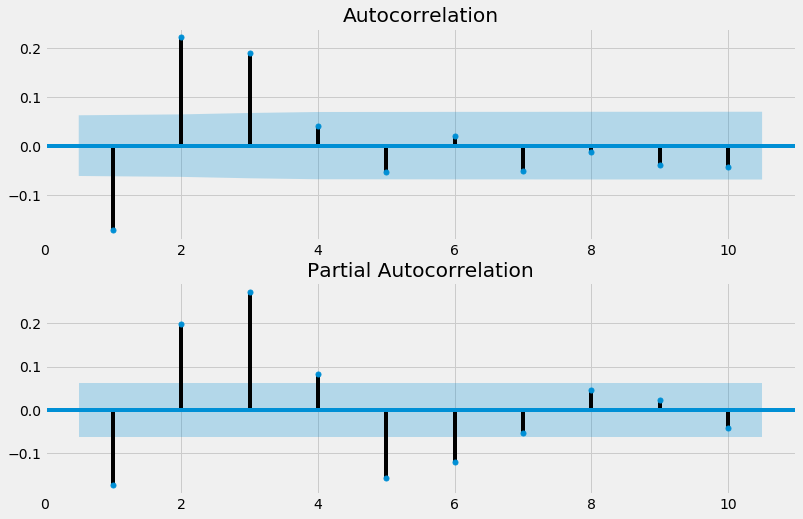

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

# Plot the ACF of df
plot_acf(df, lags=10, zero=False, ax=ax1);

# Plot the PACF of df
plot_pacf(df, lags=10, zero=False, ax=ax2);

#### Question :

Au vue des valeurs de l'ACF et de la PACF, quel serait le meileur modèle pour expliquer les données observées ?

### Magnitude sismique

Continuons d'utiliser la même heuristique pour un nouveau jeu de données présentant les magnitudes sismiques annuelles moyennes.

Commençon par télécharger et afficher les données :

In [ ]:
earthquake = pd.read_csv('./dataset/earthquakes.csv', index_col='date', parse_dates=True)
earthquake.drop(['Year'], axis=1, inplace=True)
earthquake = earthquake.asfreq('AS-JAN')
earthquake.head()

earthquakes_per_year
date                            
1900-01-01                  13.0
1901-01-01                  14.0
1902-01-01                   8.0
1903-01-01                  10.0
1904-01-01                  16.0

### Exercice : 

Afficher et l'ACF et la PACF pour cette série et déterminer le modèle le plus convenable

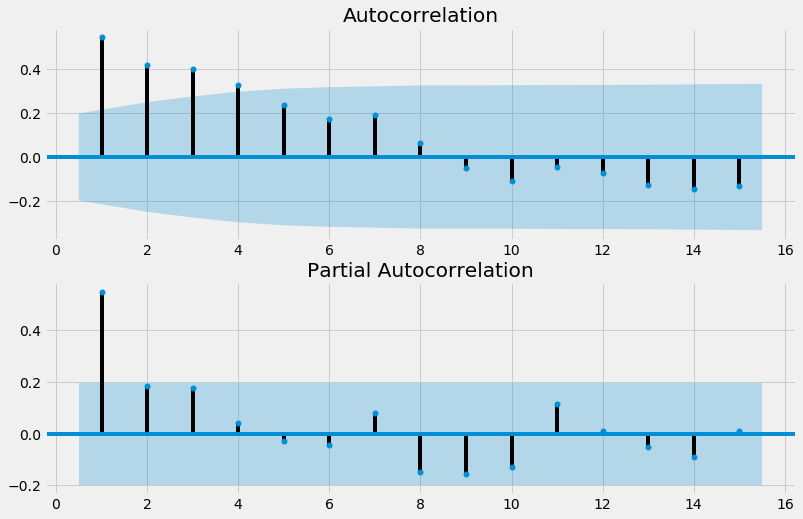

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF and PACF
### Votre Code ici ####

In [ ]:
# Instatiate model
model = SARIMAX(earthquake, order=(1, 0, 0))

# Train model
results = model.fit()

## Évaluation

Dans cette partie nous nous intéresserons à différents critères d'erreurs pour évaluer à quel point notre modèle est pertinent.

### Erreur absolue moyenne

L'erreur absolue moyenne MAE est souvent utilisée pour évaluer un modèle : 

$$\text{MAE} = \frac{1}{T} \sum_{t=1}^T |\hat x_t - x_t| \; ,$$
où $\hat x_t$ est la baleur de $x_t$ prédite par le modèle.

Calculons cette erreur sur la série de relevée sismiques pour voir à quel point notre modèle est bon :

4.7556256718469045


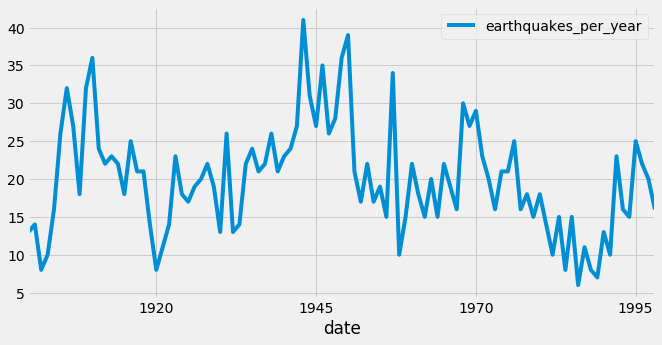

In [ ]:
# Fit model
model = SARIMAX(earthquake, order=(1, 0, 1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquake.plot();

### Exercice :

Comparer à l'erreur obtenue pour un modèle différent.

### Statistique résiduelles et diagnostique

Un critère important en estimation de modèle est la distribution du résidu. Celui-ci ne doit pas être corrélé car le contraire indiquerait que cette erreur pourrait être prise en compte dans le modèle. 



Nous nous intéresserons aux quantitées suivantes : 

| Observation     | Attendu                |
|------|----------------------|
| Valeur du résidu  | Pas de tendance ou de périodicité |
| Histogramme et KDE| L'histogramme et l'estimation de la densité doivent être proche d'une gaussienne |
| Quantile théorique loi Normale vs. Empirique | La plupart des points sont sur la bissectrice |
| Correlogramme | 95% des corrélations pour un lag supérieur à 1 ne sont pas significantes |



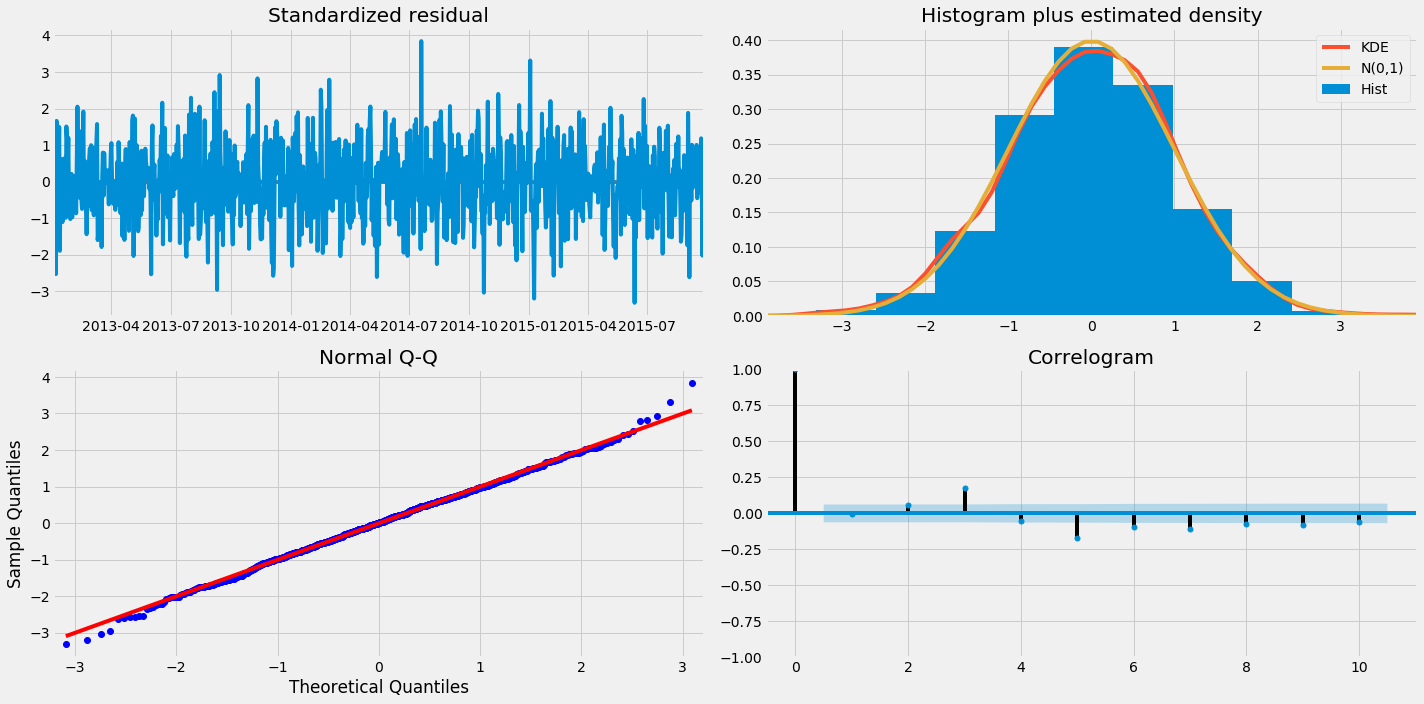

In [ ]:
# Create and fit model
model = SARIMAX(df, order=(1, 1, 1))
results=model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics(figsize=(20, 10));
plt.tight_layout();
plt.savefig('../images/plot_diagnostics.png')

## Méthode de Box-Jenkins
![box_jenkins](https://github.com/goodboychan/chans_jupyter/blob/master/_notebooks/image/box_jenkins.png?raw=1)

La méthode Box-Jenkins est un protocole d'estimation de modèle. La première étape consiste à identifier le modèle et donc repérer toute tendance ou périodicité avant d'étudier l'ACF ou la PACF. D'autres critères tels que BIC ou AIC peuvent aussi être analysés. Une fois un modèle identifié, l'étude de l'erreur et du résidu doivent permettre de déterminer si l'estimation est bonne. Dans le cas contraire, il faut recommencer la procédure.


### Identification
Nous allons nous intéresser à une série présentant les valeurs d'épargne des particulier en pourcentage des revenus disponibles pour la période de 1955-1979 aux USA.

La première étape est de s'assurer que le jeu de donnée ne contient ni tendance ni périodicité. Nous allons effectuer le test [Dicky-Fuller](https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test) pour s'en assurer. Ce test n'est pas une garantie forte mais une faible valeur de celui-ci indique l'abscence de tendance.

In [ ]:
savings = pd.read_csv('./dataset/savings.csv', parse_dates=True, index_col='date')
savings = savings.asfreq('QS')
savings.head()

savings
date               
1955-01-01      4.9
1955-04-01      5.2
1955-07-01      5.7
1955-10-01      5.7
1956-01-01      6.2

(-3.1858990962421405, 0.020815541644114133, 2, 99, {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}, 188.1686662239687)
0.020815541644114133


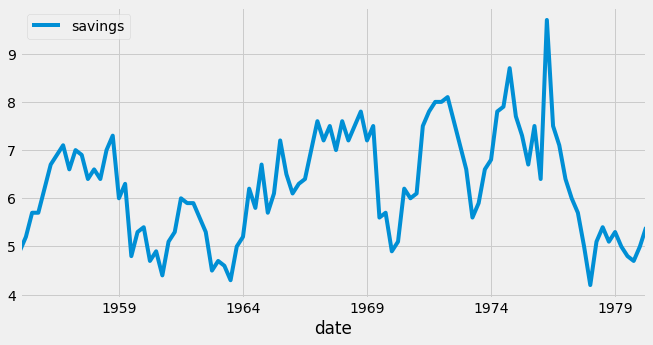

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Plot time series
savings.plot();

# Run Dicky-Fuller test
result = adfuller(savings['savings'])

# Print test statistics
print(result[0])

# Print p-value
print(result[1])

La série étudiée ne contient aucune tendance ou périodicité nécessitant de la différencier. Un processus AR, MA ou ARMA pourra donc convenir. Reste à trouver le bon modèle.

### Exercice

Identifier un modèle plausible en se basant sur les valeurs d'ACF et de PACF

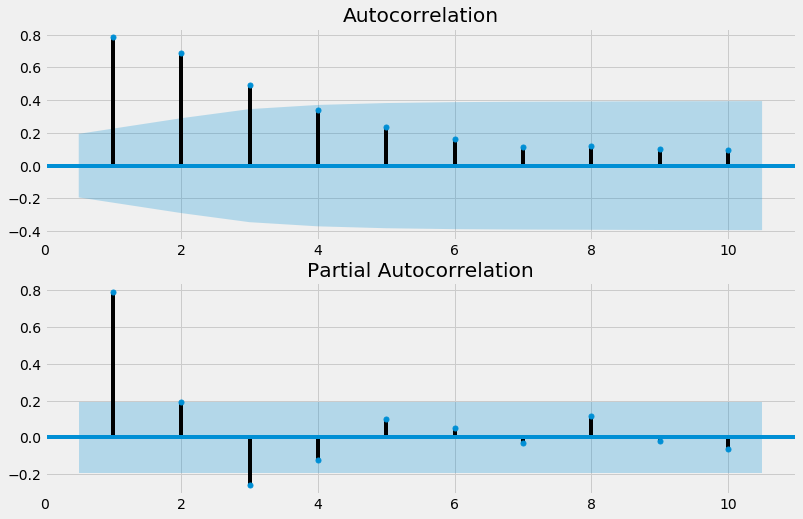

In [ ]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

### Votre code ici ###
# Plot the ACF of savings on ax1


# Plot the PACF of savings on ax2


### Estimation

L'ACF et la PACF peuvent donner des indices sur le modèle mais pour essayer d'avoir le meilleur modèle nous allons en tester plusieurs.

### Exercice

Compléter le code suivant pour tester tout les modèle ARMA($p,q$) pour des valeurs de $p$ et $q$ allant de 0 à 3. On utilisera la classe `SARIMAX` pour créer un model ARMA et la méthode `.fit()` pour l'ajuster.

In [ ]:
# Loop over p values from 0-3
for p in range(4):
    
    # Loop over q values from 0-3
    for q in range(4):
        try:
            # Create and fit ARMA(p, q) model
            ### Votre Code ici ###
            
            # Print p, q, AIC, BIC
            print(p, q, results.aic, results.bic)
        except:
            print(p, q, None, None)

0 0 313.6028657326894 318.85281135925794
0 1 267.06970976886913 274.94462820872195
0 2 232.16782676455585 242.66771801769295
0 3 217.59720511188743 230.7220691783088
1 0 216.20348062499983 224.07839906485265
1 1 215.7003896386748 226.2002808918119
1 2 207.65298608433693 220.7778501507583
1 3 209.57498691600946 225.32482379571508
2 0 213.9723232754384 224.4722145285755
2 1 213.43035679044817 226.55522085686954


/home/chanseok/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2 2 209.57903436790426 225.32887124760987
2 3 211.57503208933585 229.94984178232573
3 0 209.5449310791239 222.66979514554527
3 1 210.8214763494127 226.57131322911835
3 2 211.45759881817608 229.83240851116597
3 3 213.54389994712193 234.5436824533961


Les valeurs d'AIC et BIC devrait pointer vers un modèle ARMA(1,2) comme étant le meilleur.

### Diagnostique

Analysons le résidut pour le meilleur modèle :

                               SARIMAX Results                                
Dep. Variable:                savings   No. Observations:                  102
Model:               SARIMAX(1, 0, 2)   Log Likelihood                 -98.826
Date:                Tue, 16 Jun 2020   AIC                            207.653
Time:                        10:54:42   BIC                            220.778
Sample:                    01-01-1955   HQIC                           212.968
                         - 04-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6813      0.714      2.356      0.018       0.283       3.080
ar.L1          0.7286      0.111      6.538      0.000       0.510       0.947
ma.L1         -0.0539      0.145     -0.372      0.7

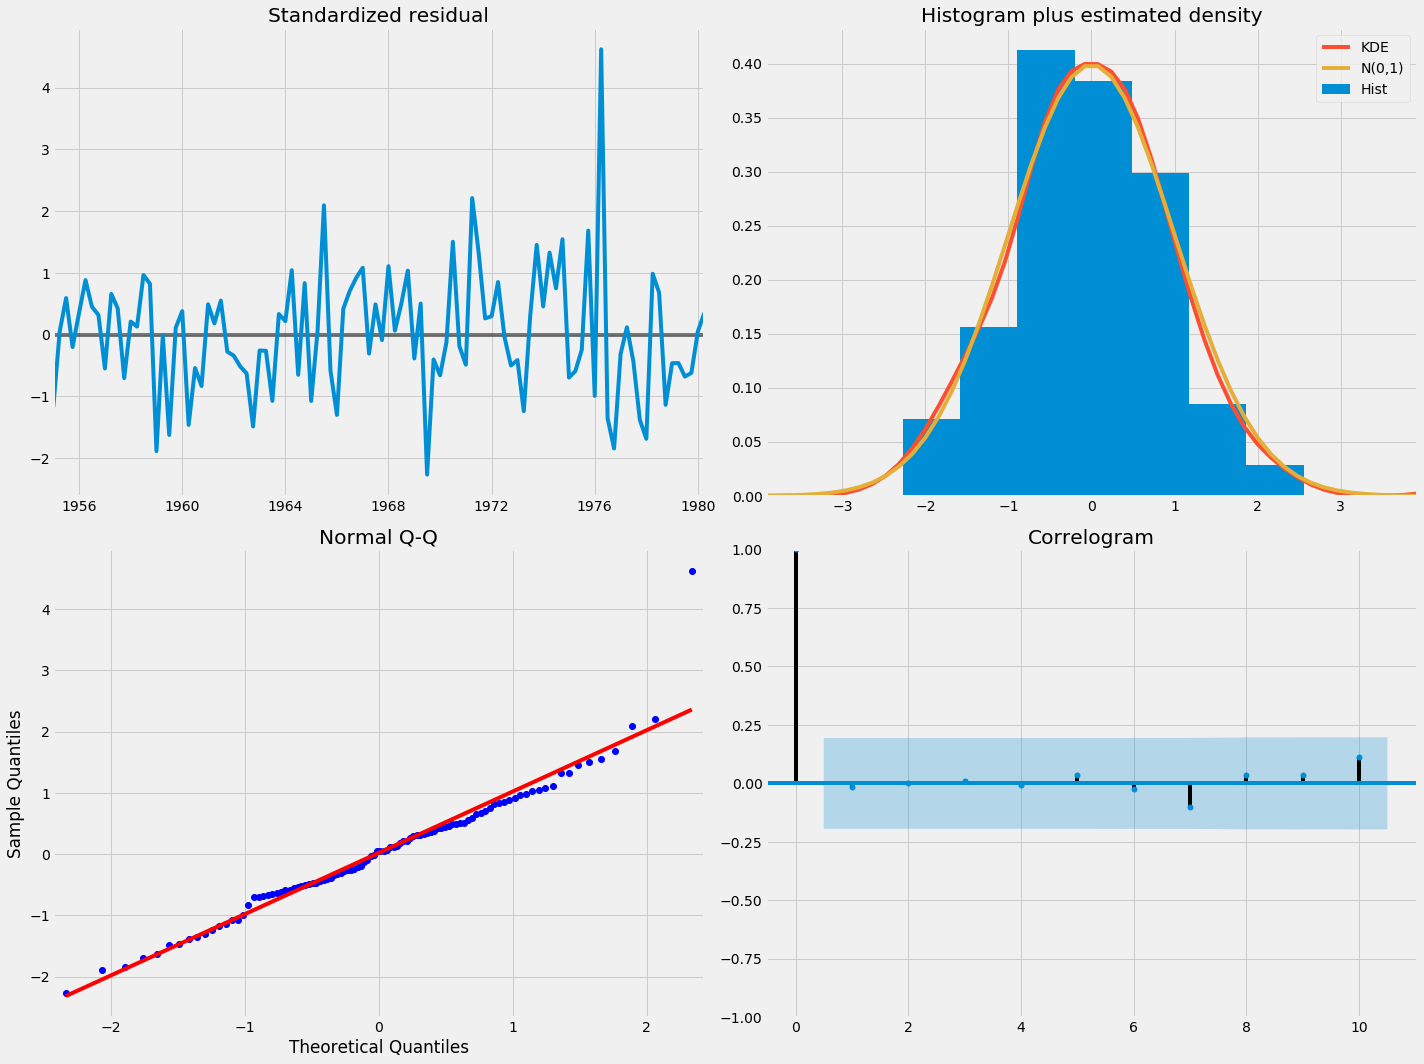

In [ ]:
# Create and fit model
model = SARIMAX(savings, order=(1, 0, 2), trend='c')
results = model.fit()

# Create the 4 diagnostics plots
results.plot_diagnostics(figsize=(20, 15));
plt.tight_layout()

# Print summary
print(results.summary())

Le test Jarque-Bera contrôle la probabilité que le résidue soir distribué selon une loi normal. Ici Prob(JB):0.00 ce qui indique que cette hypothèse doit être rejetée. Toutefois, les quantiles de la distribution empirique semblent relativement proche des quantiles théorique pour une loi normale. Une valeur abérante est certaienement responsable de la mauvaise valeur du test. L'histogramme et le corrélogramme semblent également satisfaisants. 